Analyze and Clean Rat Sighting Dataset

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("Rat_Sightings_20240917.csv", low_memory=False)

In [14]:
# Keep only the necessary columns
df = df[['Created Date', 'Location Type', 'Incident Zip', 'Community Board', 'Borough', 'Latitude', 'Longitude']]

# Drop rows with unspecified boroughs
df = df[df['Borough'] != 'Unspecified']
df.reset_index(drop=True, inplace=True)

# Drop NAs
df.dropna(subset=['Created Date', 'Location Type', 'Incident Zip', 'Community Board', 'Borough', 'Latitude', 'Longitude'], inplace=True)

# Get unique values in 'Location Type'
unique_location_types = df['Location Type'].unique()

# Define mapping for residential categories
residential_mapping = {
    'Single Room Occupancy (SRO)': 'Single',
    '1-2 Family Dwelling': '1-2 Family Apartment',
    '1-2 FamilyDwelling': '1-2 Family Apartment',
    '3+ Family Apt. Building': '3+ Family',
    '3+ Family Apartment Building': '3+ Family',
    '3+ Family Apt.': '3+ Family',
    '3+Family Apt.': '3+ Family',
    '3+ Family Apt': '3+ Family',
    '1-3 Family Dwelling': '1-3 Family Dwelling',
    '1-3 Family Mixed Use Building': '1-3 Family Mixed',
    '1-2 Family Mixed Use Building': '1-2 Family Mixed',
    '3+ Family Mixed Use Building': '3+ Family Mixed',
    'Private House': 'Private House',
    'Apartment': 'Apartment',
    'Residential Property': 'Residential Property'
}

# Apply mapping to the 'Location Type' column for residential data
df['Location Type'] = df['Location Type'].replace(residential_mapping)
df

,Created Date,Location Type,Incident Zip,Community Board,Borough,Latitude,Longitude
0,5/31/2024 0:10,Vacant Lot,11377.0,02 QUEENS,QUEENS,40.740375,-73.896454
1,6/1/2024 15:01,1-2 Family Apartment,11357.0,07 QUEENS,QUEENS,40.781667,-73.807381
2,6/6/2024 10:08,3+ Family,11385.0,05 QUEENS,QUEENS,40.705669,-73.908352
3,6/25/2024 11:34,3+ Family,10467.0,07 BRONX,BRONX,40.884066,-73.879225
4,6/27/2024 10:48,1-2 Family Apartment,11220.0,07 BROOKLYN,BROOKLYN,40.642061,-74.015862
...,...,...,...,...,...,...,...
253247,5/15/2024 18:38,Vacant Lot,10011.0,04 MANHATTAN,MANHATTAN,40.740951,-74.003244
253248,5/15/2024 6:58,3+ Family,10029.0,11 MANHATTAN,MANHATTAN,40.796473,-73.936536
253249,5/15/2024 19:29,1-2 Family Apartment,11209.0,10 BROOKLYN,BROOKLYN,40.636079,-74.034564
253250,5/15/2024 10:25,3+ Family Mixed,10031.0,09 MANHATTAN,MANHATTAN,40.824874,-73.948819


Clean and Analyze Income Data

In [15]:
# Income data df, zipcodes for NYC boroughs, and rat sightings df
income_df = pd.read_csv("us_income_zipcode.csv")
zipcode_borough = pd.read_csv("New_York_State_ZIP_Codes-County_FIPS_Cross-Reference.csv")

In [16]:
### Dropping all margin of error columns
def drop_margin_cols():
    lst = income_df.columns
    remove_list = []

    for col in lst:
        if "Margin of Error" in col:
            remove_list.append(col)
    return remove_list

lst = drop_margin_cols()
income_df.drop(lst, axis=1, inplace=True)

#Dropping other useless columns
income_df.drop(["Geography", "Geographic Area Name"], axis=1, inplace=True)
income_df

#Dropping columns we don't need from borough df
zipcode_borough.drop(["State FIPS", "County Code", "File Date", "County FIPS"], axis=1, inplace=True)
zipcode_borough

,County Name,ZIP Code
0,Albany,12007
1,Albany,12009
2,Albany,12023
3,Albany,12041
4,Albany,12045
...,...,...
2538,Yates,14561
2539,Yates,14837
2540,Yates,14842
2541,Yates,14857


In [17]:
#Merging income_df and zipcode_borough
merged_df = income_df.merge(zipcode_borough, left_on="ZIP", right_on="ZIP Code")

#Filtering to only the 5 boroughs of NYC
merged_df = merged_df[(merged_df["County Name"] == "Bronx") | (merged_df["County Name"] == "Queens") | (merged_df["County Name"] == "New York") | (merged_df["County Name"] == "Kings") | (merged_df["County Name"] == "Richmond")]

#Dropping ZIP Code cause we don't need it (redundant column)
merged_df.drop("ZIP Code", axis=1, inplace=True)

#Fixing year to make it an int
merged_df["Year"] = merged_df["Year"].astype(int)

#Fixing households to make them ints
merged_df["Households"] = merged_df["Households"].astype(int)

#No more NA values!!!
merged_df.dropna()
merged_df

,ZIP,Households,"Households Less Than $10,000","Households $10,000 to $14,999","Households $15,000 to $24,999","Households $25,000 to $34,999","Households $35,000 to $49,999","Households $50,000 to $74,999","Households $75,000 to $99,999","Households $100,000 to $149,999",...,"Nonfamily Households $50,000 to $74,999","Nonfamily Households $75,000 to $99,999","Nonfamily Households $100,000 to $149,999","Nonfamily Households $150,000 to $199,999","Nonfamily Households $200,000 or More",Nonfamily Households Median Income (Dollars),Nonfamily Households Mean Income (Dollars),Nonfamily Households Nonfamily Income in the Past 12 Months,Year,County Name
1,10001,14273,7.2,3.4,5.4,3.3,7.4,11.5,11.2,14.9,...,12.2,13.0,15.7,11.4,19.0,89723.0,131592.0,20.1,2021,New York
2,10002,34737,13.0,11.8,12.9,10.0,9.1,11.2,9.2,9.2,...,10.0,9.4,10.1,4.3,8.0,32489.0,69003.0,34.8,2021,New York
3,10003,25181,6.8,2.2,3.3,4.3,4.2,11.9,6.9,13.3,...,14.7,7.6,14.2,10.7,27.7,105808.0,175535.0,28.5,2021,New York
4,10004,2113,2.2,0.0,0.9,1.6,0.4,2.0,6.1,13.5,...,3.1,10.6,19.9,21.0,38.7,159518.0,218597.0,25.7,2021,New York
5,10005,4782,0.9,0.0,0.1,1.4,2.1,9.2,6.1,15.2,...,11.7,5.0,17.2,18.4,41.4,185125.0,198121.0,21.7,2021,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22134,11692,5830,14.6,8.0,9.2,16.0,11.7,17.1,8.5,10.3,...,14.9,7.9,5.3,0.3,1.2,25617.0,39178.0,40.4,2011,Queens
22135,11693,4583,12.3,4.6,7.6,7.8,17.6,16.1,14.8,15.4,...,16.3,10.2,5.9,1.6,2.6,40742.0,57435.0,46.1,2011,Kings
22136,11693,4583,12.3,4.6,7.6,7.8,17.6,16.1,14.8,15.4,...,16.3,10.2,5.9,1.6,2.6,40742.0,57435.0,46.1,2011,Queens
22137,11694,8135,4.9,4.2,8.1,10.3,9.3,14.3,11.6,20.3,...,16.4,10.9,11.4,0.4,1.7,37194.0,52125.0,47.7,2011,Queens


In [18]:
#Merging income with the rat sightings data
income_rat_df = merged_df.merge(df, left_on="ZIP", right_on="Incident Zip")

# A function to keep only the important columns and mean/median income columns for final dataframe
def save_cols():
    columns = income_rat_df.columns
    save_lst = []
    important = ["ZIP", "Households", "Year", "Created Date", "Location Type", "Community Board", "Borough", "Latitude", "Longitude"]

    for col in columns:
        if "Mean Income (Dollars)" in col or "Median Income (Dollars)" in col:
            save_lst.append(col)
        elif col in important:
            save_lst.append(col)
            
    return save_lst

lst = save_cols()
income_rat_df = income_rat_df[lst]
income_rat_df.dropna(inplace=True)
income_rat_df
#print(income_rat_df.columns)

,ZIP,Households,Households Median Income (Dollars),Households Mean Income (Dollars),Families Median Income (Dollars),Families Mean Income (Dollars),Married-Couple Families Median Income (Dollars),Married-Couple Families Mean Income (Dollars),Nonfamily Households Median Income (Dollars),Nonfamily Households Mean Income (Dollars),Year,Created Date,Location Type,Community Board,Borough,Latitude,Longitude
919,10002,34737,37093.0,76115.0,38815.0,82382.0,51689.0,101513.0,32489.0,69003.0,2021,5/16/2024 11:19,3+ Family,03 MANHATTAN,MANHATTAN,40.712894,-73.996101
920,10002,34737,37093.0,76115.0,38815.0,82382.0,51689.0,101513.0,32489.0,69003.0,2021,8/31/2024 20:15,Commercial Building,03 MANHATTAN,MANHATTAN,40.712995,-73.988529
921,10002,34737,37093.0,76115.0,38815.0,82382.0,51689.0,101513.0,32489.0,69003.0,2021,8/15/2024 5:24,3+ Family,03 MANHATTAN,MANHATTAN,40.712353,-73.993947
922,10002,34737,37093.0,76115.0,38815.0,82382.0,51689.0,101513.0,32489.0,69003.0,2021,6/4/2024 20:19,Office Building,03 MANHATTAN,MANHATTAN,40.722009,-73.993376
923,10002,34737,37093.0,76115.0,38815.0,82382.0,51689.0,101513.0,32489.0,69003.0,2021,5/8/2024 17:31,3+ Family,03 MANHATTAN,MANHATTAN,40.716111,-73.992998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790230,11435,17950,54086.0,65131.0,57789.0,70488.0,67135.0,78335.0,39375.0,51434.0,2011,4/26/2024 17:54,1-2 Family Apartment,08 QUEENS,QUEENS,40.711187,-73.810153
2790231,11435,17950,54086.0,65131.0,57789.0,70488.0,67135.0,78335.0,39375.0,51434.0,2011,5/1/2024 13:05,1-2 Family Apartment,12 QUEENS,QUEENS,40.687113,-73.799311
2790232,11435,17950,54086.0,65131.0,57789.0,70488.0,67135.0,78335.0,39375.0,51434.0,2011,5/2/2024 20:37,Commercial Building,12 QUEENS,QUEENS,40.701386,-73.804111
2790233,11435,17950,54086.0,65131.0,57789.0,70488.0,67135.0,78335.0,39375.0,51434.0,2011,5/4/2024 18:17,1-2 Family Apartment,12 QUEENS,QUEENS,40.694572,-73.809710


We want to create a single column that gives us the average income in an area. We currently have two measures of center for the income: median and mean. As mean is dramatically influenced by skew, we decided to procede with the median as our main measure of average income. 

In [19]:
# List of median income columns
median_income_columns = [
    'Households Median Income (Dollars)',
    'Families Median Income (Dollars)',
    'Married-Couple Families Median Income (Dollars)',
    'Nonfamily Households Median Income (Dollars)'
]

# Calculate the average of the median income columns
income_rat_df['Average Income (Dollars)'] = income_rat_df[median_income_columns].mean(axis=1)

# Drop the original mean and median columns
columns_to_drop = [
    'Households Median Income (Dollars)',
    'Households Mean Income (Dollars)',
    'Families Median Income (Dollars)',
    'Families Mean Income (Dollars)',
    'Married-Couple Families Median Income (Dollars)',
    'Married-Couple Families Mean Income (Dollars)',
    'Nonfamily Households Median Income (Dollars)',
    'Nonfamily Households Mean Income (Dollars)'
]

income_rat_df = income_rat_df.drop(columns=columns_to_drop)

income_rat_df

,ZIP,Households,Year,Created Date,Location Type,Community Board,Borough,Latitude,Longitude,Average Income (Dollars)
919,10002,34737,2021,5/16/2024 11:19,3+ Family,03 MANHATTAN,MANHATTAN,40.712894,-73.996101,40021.50
920,10002,34737,2021,8/31/2024 20:15,Commercial Building,03 MANHATTAN,MANHATTAN,40.712995,-73.988529,40021.50
921,10002,34737,2021,8/15/2024 5:24,3+ Family,03 MANHATTAN,MANHATTAN,40.712353,-73.993947,40021.50
922,10002,34737,2021,6/4/2024 20:19,Office Building,03 MANHATTAN,MANHATTAN,40.722009,-73.993376,40021.50
923,10002,34737,2021,5/8/2024 17:31,3+ Family,03 MANHATTAN,MANHATTAN,40.716111,-73.992998,40021.50
...,...,...,...,...,...,...,...,...,...,...
2790230,11435,17950,2011,4/26/2024 17:54,1-2 Family Apartment,08 QUEENS,QUEENS,40.711187,-73.810153,54596.25
2790231,11435,17950,2011,5/1/2024 13:05,1-2 Family Apartment,12 QUEENS,QUEENS,40.687113,-73.799311,54596.25
2790232,11435,17950,2011,5/2/2024 20:37,Commercial Building,12 QUEENS,QUEENS,40.701386,-73.804111,54596.25
2790233,11435,17950,2011,5/4/2024 18:17,1-2 Family Apartment,12 QUEENS,QUEENS,40.694572,-73.809710,54596.25


DO THIS AFTER MERGING!!!!!! - BETTER FOR PREVENTING CLASS IMBALANCES

Plot Rat Sightings over time (Month and Year) to split into classes for rat concentrations. We will get three classes: Low, Medium, High

In [20]:
# Convert 'Created Date' to datetime format
income_rat_df['Created Date'] = pd.to_datetime(income_rat_df['Created Date'])

# Extract month, week, and day information
income_rat_df['Month'] = income_rat_df['Created Date'].dt.month

# Check the updated dataframe
print(income_rat_df[['Created Date', 'Month']].head())

           Created Date  Month
919 2024-05-16 11:19:00      5
920 2024-08-31 20:15:00      8
921 2024-08-15 05:24:00      8
922 2024-06-04 20:19:00      6
923 2024-05-08 17:31:00      5


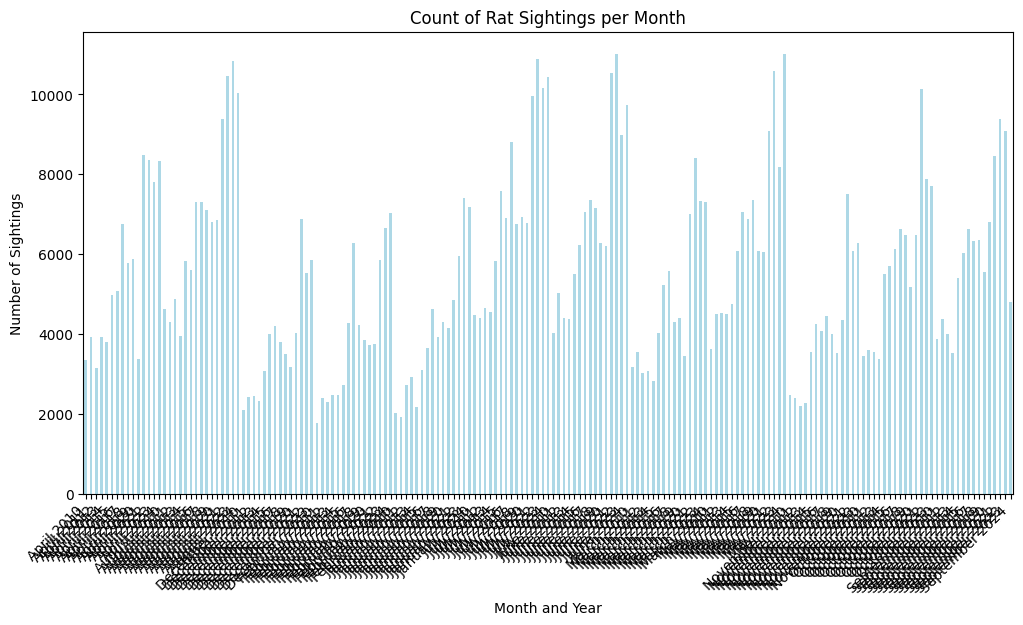

In [21]:
income_rat_df['Year-Month'] = income_rat_df['Created Date'].dt.strftime('%B %Y')
rat_sightings_by_month = income_rat_df['Year-Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
rat_sightings_by_month.plot(kind='bar', color='lightblue')
plt.title('Count of Rat Sightings per Month')
plt.xlabel('Month and Year')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.show()

In [22]:
quantiles = pd.qcut(rat_sightings_by_month, 3, labels=["Low", "Medium", "High"])
rat_sightings_by_month_category = quantiles
category_mapping = rat_sightings_by_month_category.to_dict()

income_rat_df['Rat Concentration'] = income_rat_df['Year-Month'].map(category_mapping)
income_rat_df.drop("Created Date", axis=1, inplace=True)
income_rat_df.drop("Year", axis=1, inplace=True)

income_rat_df

,ZIP,Households,Location Type,Community Board,Borough,Latitude,Longitude,Average Income (Dollars),Month,Year-Month,Rat Concentration
919,10002,34737,3+ Family,03 MANHATTAN,MANHATTAN,40.712894,-73.996101,40021.50,5,May 2024,High
920,10002,34737,Commercial Building,03 MANHATTAN,MANHATTAN,40.712995,-73.988529,40021.50,8,August 2024,High
921,10002,34737,3+ Family,03 MANHATTAN,MANHATTAN,40.712353,-73.993947,40021.50,8,August 2024,High
922,10002,34737,Office Building,03 MANHATTAN,MANHATTAN,40.722009,-73.993376,40021.50,6,June 2024,High
923,10002,34737,3+ Family,03 MANHATTAN,MANHATTAN,40.716111,-73.992998,40021.50,5,May 2024,High
...,...,...,...,...,...,...,...,...,...,...,...
2790230,11435,17950,1-2 Family Apartment,08 QUEENS,QUEENS,40.711187,-73.810153,54596.25,4,April 2024,High
2790231,11435,17950,1-2 Family Apartment,12 QUEENS,QUEENS,40.687113,-73.799311,54596.25,5,May 2024,High
2790232,11435,17950,Commercial Building,12 QUEENS,QUEENS,40.701386,-73.804111,54596.25,5,May 2024,High
2790233,11435,17950,1-2 Family Apartment,12 QUEENS,QUEENS,40.694572,-73.809710,54596.25,5,May 2024,High


In [23]:
# Define summer months
summer_months = [6, 7, 8]

# Add a new column for summer (1 for summer, 0 for others)
income_rat_df['Is_Summer'] = income_rat_df['Month'].apply(lambda x: 1 if x in summer_months else 0)

# Check the updated DataFrame
income_rat_df

,ZIP,Households,Location Type,Community Board,Borough,Latitude,Longitude,Average Income (Dollars),Month,Year-Month,Rat Concentration,Is_Summer
919,10002,34737,3+ Family,03 MANHATTAN,MANHATTAN,40.712894,-73.996101,40021.50,5,May 2024,High,0
920,10002,34737,Commercial Building,03 MANHATTAN,MANHATTAN,40.712995,-73.988529,40021.50,8,August 2024,High,1
921,10002,34737,3+ Family,03 MANHATTAN,MANHATTAN,40.712353,-73.993947,40021.50,8,August 2024,High,1
922,10002,34737,Office Building,03 MANHATTAN,MANHATTAN,40.722009,-73.993376,40021.50,6,June 2024,High,1
923,10002,34737,3+ Family,03 MANHATTAN,MANHATTAN,40.716111,-73.992998,40021.50,5,May 2024,High,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2790230,11435,17950,1-2 Family Apartment,08 QUEENS,QUEENS,40.711187,-73.810153,54596.25,4,April 2024,High,0
2790231,11435,17950,1-2 Family Apartment,12 QUEENS,QUEENS,40.687113,-73.799311,54596.25,5,May 2024,High,0
2790232,11435,17950,Commercial Building,12 QUEENS,QUEENS,40.701386,-73.804111,54596.25,5,May 2024,High,0
2790233,11435,17950,1-2 Family Apartment,12 QUEENS,QUEENS,40.694572,-73.809710,54596.25,5,May 2024,High,0


Check class count

In [24]:
# Count the number of rows for each value in the "Rat Concentration" column
rat_concentration_counts = income_rat_df["Rat Concentration"].value_counts()

# Print the counts for each value
print(rat_concentration_counts)


Rat Concentration
High      481186
Medium    307325
Low       188691
Name: count, dtype: int64


Random Forest Classifier

Classification Report:
              precision    recall  f1-score   support

        High       0.75      0.74      0.74     96238
         Low       0.51      0.58      0.55     37738
      Medium       0.57      0.53      0.55     61465

    accuracy                           0.64    195441
   macro avg       0.61      0.62      0.61    195441
weighted avg       0.65      0.64      0.65    195441



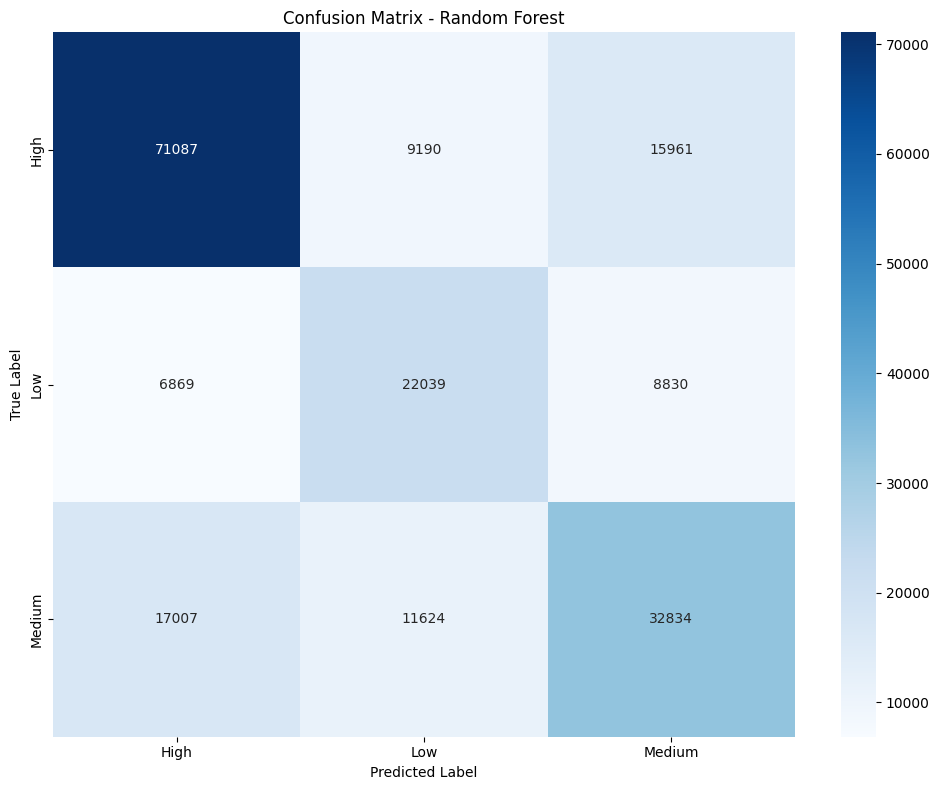


Feature Importances:
                    Feature  Importance
0                  Latitude    0.431351
1                 Longitude    0.422659
4                 Is_Summer    0.094931
3                Households    0.026768
2  Average Income (Dollars)    0.024290


C:\Users\Lasya M\AppData\Local\Temp\ipykernel_33644\4138828107.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


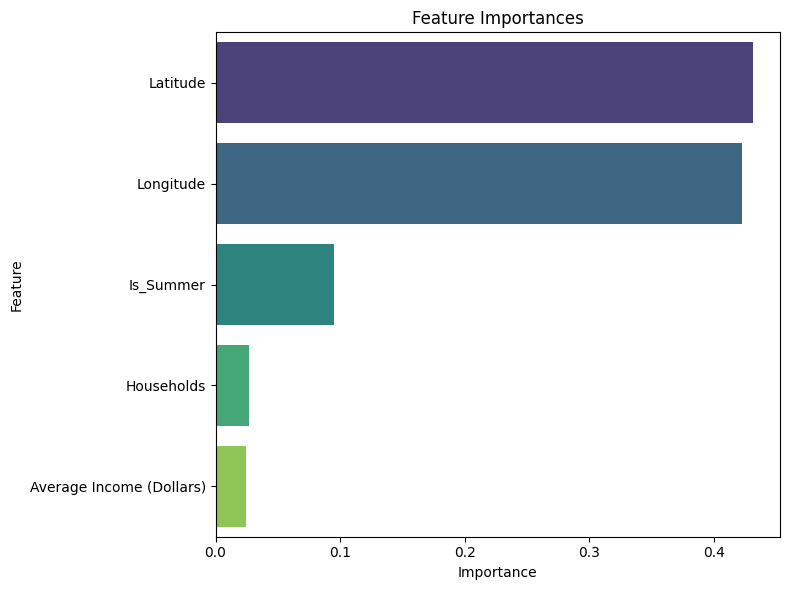

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to train and evaluate a Random Forest model
def train_random_forest_model(income_rat_df):
    # Select features and target variable
    features = ['Latitude', 'Longitude', 'Average Income (Dollars)', 'Households', 'Is_Summer']
    target = 'Rat Concentration'
    X = income_rat_df[features]
    y = income_rat_df[target]
    
    # Encode the target variable if necessary
    if y.dtype == 'object' or y.dtype.name == 'category':
        y = y.astype('category').cat.codes  # Converts high/medium/low to integers

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(
        n_estimators=100,  # Number of trees
        class_weight='balanced',  # Handles class imbalances automatically
        random_state=42
    )

    # Train the model
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['High', 'Low', 'Medium']))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['High', 'Low', 'Medium'],
                yticklabels=['High', 'Low', 'Medium'])
    plt.title('Confusion Matrix - Random Forest')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # Feature Importance
    feature_importances = rf_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    print("\nFeature Importances:")
    print(feature_importance_df)

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title('Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

    return rf_model

# Call the function
random_forest_model = train_random_forest_model(income_rat_df)


OLD CODE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Model Training
def train_rat_concentration_model(income_rat_df):
    # Prepare the features and target
    X = income_rat_df[['ZIP', 'Community Board', 'Location Type', 'Average Income (Dollars)']]
    y = income_rat_df['Rat Concentration']
    
    class_weights = {
        'Low': 2.55,   # More weight to the minority class
        'Medium': 1,
        'High': 1
    }

    # Preprocessing for categorical and numerical columns
    # Identify column types
    categorical_columns = ['ZIP', 'Community Board', 'Location Type']
    numeric_columns = ['Average Income (Dollars)']
    
    # Create preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
            ('num', StandardScaler(), numeric_columns)
        ])
    
    # Create a pipeline with preprocessing and Random Forest Classifier
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(
            n_estimators=100, 
            class_weight=class_weights,
            random_state=42
        ))
    ])
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Generate Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix Visualization
    plt.figure(figsize=(10,8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=pipeline.named_steps['classifier'].classes_,
                yticklabels=pipeline.named_steps['classifier'].classes_)
    plt.title('Confusion Matrix - Rat Concentration Prediction')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()
    
    # Feature Importance
    feature_names = (
        preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns).tolist() + 
        numeric_columns
    )
    feature_importances = pipeline.named_steps['classifier'].feature_importances_   
    return pipeline

# Call the function
model = train_rat_concentration_model(income_rat_df)